In [ ]:
# mengkoneksikan colab dengan google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import library
import pandas as pd
import numpy as np
#from datetime import date
from IPython.display import Image
pd.options.mode.chained_assignment = None  # default='warn'

In [ ]:
%ls

drive/  sample_data/


In [ ]:
# import dataset kedalam program python
event_df = pd.read_csv('drive/MyDrive/ProcessMiningResearch/ver20_bersih.csv', sep=',', low_memory=False)

In [ ]:
# Melihat Ringkasan dataset
event_df.head()

,CaseID,LABEL,Time_Stamps,Group_Activities,CTR_SIZE,CTR_TYPE,ORI_CTR_STATUS,GROSS,CUSTOMS_DEL_DOC_TYPE,FINAL_CTR_STATUS,CUSTOMS_BHD_DOC_TYPE,BHD_TYPE,CUSTOMS_PERMIT_DOC_TYPE
0,3042664,A,03-01-15 7:40,berth discharge,40.0,DRY,FCL,10.0,NaN,NaN,NaN,NaN,NaN
1,3042664,B,03-01-15 8:21,yard discharge,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3042664,N,31-07-15 10:23,delivery,NaN,NaN,NaN,NaN,SPPB,NaN,NaN,NaN,NaN
3,3042664,O,31-07-15 19:21,delivery,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3042664,P,31-07-15 19:39,delivery,NaN,NaN,NaN,NaN,NaN,FCL,NaN,NaN,NaN


In [ ]:
# melihat bentuk pada dataset
print('{} rows and {} columns.'.format(event_df.shape[0], event_df.shape[1]))

531581 rows and 13 columns.


In [ ]:
# melakukan pemilihan column yang digunakan dan membentuk dataset baru
events = event_df[['CaseID', 'LABEL', 'Time_Stamps']]

In [ ]:
# merubah nama colum yang digunakan pada dataset
events.rename(columns={'CaseID':'case',
                       'LABEL':'label',
                       'Time_Stamps':'datetime'
                       }, inplace=True)

In [ ]:
# melihat ringkasan dataset
events.head()

,case,label,datetime
0,3042664,A,03-01-15 7:40
1,3042664,B,03-01-15 8:21
2,3042664,N,31-07-15 10:23
3,3042664,O,31-07-15 19:21
4,3042664,P,31-07-15 19:39


In [ ]:
# melihat type data pada dataset
events.dtypes

case         int64
label       object
datetime    object
dtype: object

In [ ]:
# merubah type data pada colum case menjadi string (object)
events['case'] = events.astype(str)

In [ ]:
# merubah type data pada column datetime menjadi datetime
events['datetime'] = pd.to_datetime(events['datetime'])

In [ ]:
# melihat type data pada dataset
events.dtypes

case                object
label               object
datetime    datetime64[ns]
dtype: object

In [ ]:
# melakukan pengecekan missing value pada dataset
events.isna().sum()

case        0
label       0
datetime    0
dtype: int64

In [ ]:
events.head()

,case,label,datetime
0,3042664,A,2015-03-01 07:40:00
1,3042664,B,2015-03-01 08:21:00
2,3042664,N,2015-07-31 10:23:00
3,3042664,O,2015-07-31 19:21:00
4,3042664,P,2015-07-31 19:39:00


In [ ]:
# Installasi modul PM4PY
!pip install pm4py

     |████████████████████████████████| 1.5 MB 5.1 MB/s 
     |████████████████████████████████| 40.6 MB 74 kB/s 
  Created wheel for stringdist: filename=StringDist-1.0.9-cp37-cp37m-linux_x86_64.whl size=23592 sha256=b63aa820caa8e3a1bc81d0bc2afde3ae43d53e91b11b26541466ef9052231303
  Stored in directory: /root/.cache/pip/wheels/d7/9c/d4/63bc3d8931de0980b9e4a724dea290bb40b8b1b2bd6227c8da
Successfully built stringdist


In [ ]:
events.rename(columns={'datetime': 'time:timestamp', 'case': 'case:concept:name', 'label': 'concept:name'}, inplace=True)

In [ ]:
from pm4py.algo.filtering.pandas.start_activities import start_activities_filter
log_start = start_activities_filter.get_start_activities(events)
df_start_activities = start_activities_filter.apply(events, ["A"])

In [ ]:
df_start_activities

,case:concept:name,concept:name,time:timestamp
0,3042664,A,2015-03-01 07:40:00
1,3042664,B,2015-03-01 08:21:00
2,3042664,N,2015-07-31 10:23:00
3,3042664,O,2015-07-31 19:21:00
4,3042664,P,2015-07-31 19:39:00
...,...,...,...
531576,4025040,A,2015-09-30 09:30:00
531577,4025040,B,2015-09-30 09:44:00
531578,4025040,N,2015-09-30 13:24:00
531579,4025040,O,2015-09-30 13:52:00


In [ ]:
from pm4py.algo.filtering.pandas.end_activities import end_activities_filter
end_activities = end_activities_filter.get_end_activities(df_start_activities)
filtered_df = end_activities_filter.apply(df_start_activities, ["P"])

In [ ]:
filtered_df

,case:concept:name,concept:name,time:timestamp
0,3042664,A,2015-03-01 07:40:00
1,3042664,B,2015-03-01 08:21:00
2,3042664,N,2015-07-31 10:23:00
3,3042664,O,2015-07-31 19:21:00
4,3042664,P,2015-07-31 19:39:00
...,...,...,...
531576,4025040,A,2015-09-30 09:30:00
531577,4025040,B,2015-09-30 09:44:00
531578,4025040,N,2015-09-30 13:24:00
531579,4025040,O,2015-09-30 13:52:00


In [ ]:
from pm4py.statistics.traces.generic.pandas import case_statistics
variants_count = case_statistics.get_variant_statistics(filtered_df)
variants_count = sorted(variants_count, key=lambda x: x['case:concept:name'], reverse=True)

In [ ]:
variants_count

[{'case:concept:name': 96904, 'variant': 'A,B,N,O,P'},
 {'case:concept:name': 3734, 'variant': 'A,B,C,D,E,F,N,O,P'},
 {'case:concept:name': 772, 'variant': 'A,B,K,L,M,N,O,P'},
 {'case:concept:name': 238, 'variant': 'A,B,C,D,E,N,F,O,P'},
 {'case:concept:name': 150, 'variant': 'A,B,C,D,F,E,N,O,P'},
 {'case:concept:name': 132, 'variant': 'A,B,C,E,N,O,P'},
 {'case:concept:name': 121, 'variant': 'A,N,B,O,P'},
 {'case:concept:name': 103, 'variant': 'A,B,C,D,E,N,O,P'},
 {'case:concept:name': 26, 'variant': 'A,B,K,M,N,O,P'},
 {'case:concept:name': 22, 'variant': 'A,B,N,C,D,O,P'},
 {'case:concept:name': 14, 'variant': 'A,B,N,G,H,I,J,O,P'},
 {'case:concept:name': 11, 'variant': 'A,B,O,N,P'},
 {'case:concept:name': 11, 'variant': 'A,B,N,C,O,P'},
 {'case:concept:name': 11, 'variant': 'A,B,K,M,N,L,O,P'},
 {'case:concept:name': 10, 'variant': 'A,B,C,E,D,N,O,P'},
 {'case:concept:name': 8, 'variant': 'A,N,O,P'},
 {'case:concept:name': 8, 'variant': 'A,B,C,D,E,F,C,D,E,F,N,O,P'},
 {'case:concept:name': 

In [ ]:
df = pd.DataFrame(variants_count)

In [ ]:
df

,variant,case:concept:name
0,"A,B,N,O,P",96904
1,"A,B,C,D,E,F,N,O,P",3734
2,"A,B,K,L,M,N,O,P",772
3,"A,B,C,D,E,N,F,O,P",238
4,"A,B,C,D,F,E,N,O,P",150
5,"A,B,C,E,N,O,P",132
6,"A,N,B,O,P",121
7,"A,B,C,D,E,N,O,P",103
8,"A,B,K,M,N,O,P",26
9,"A,B,N,C,D,O,P",22


In [ ]:
from pm4py.objects.conversion.log import converter as log_converter

# mengkonversi dataset csv kedalam bentuk format log XES
log = log_converter.apply(filtered_df)

In [ ]:
log

[{'attributes': {'concept:name': '3042664'}, 'events': [{'concept:name': 'A', 'time:timestamp': Timestamp('2015-03-01 07:40:00')}, '..', {'concept:name': 'P', 'time:timestamp': Timestamp('2015-07-31 19:39:00')}]}, '....', {'attributes': {'concept:name': '4025040'}, 'events': [{'concept:name': 'A', 'time:timestamp': Timestamp('2015-09-30 09:30:00')}, '..', {'concept:name': 'P', 'time:timestamp': Timestamp('2015-09-30 14:08:00')}]}]

In [ ]:
from pm4py.algo.discovery.alpha import algorithm as alpha_miner

net, initial_marking, final_marking = alpha_miner.apply(log)

/usr/local/lib/python3.7/dist-packages/pm4py/visualization/petrinet/__init__.py:20: UserWarning: please use the pm4py.visualization.petri_net package instead
  warnings.warn("please use the pm4py.visualization.petri_net package instead")
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecatedWarning: apply is deprecated as of 2.2.5 and will be removed in 3.0.0. please use pm4py.visualization.petri_net.algorithm instead
  This is separate from the ipykernel package so we can avoid doing imports until


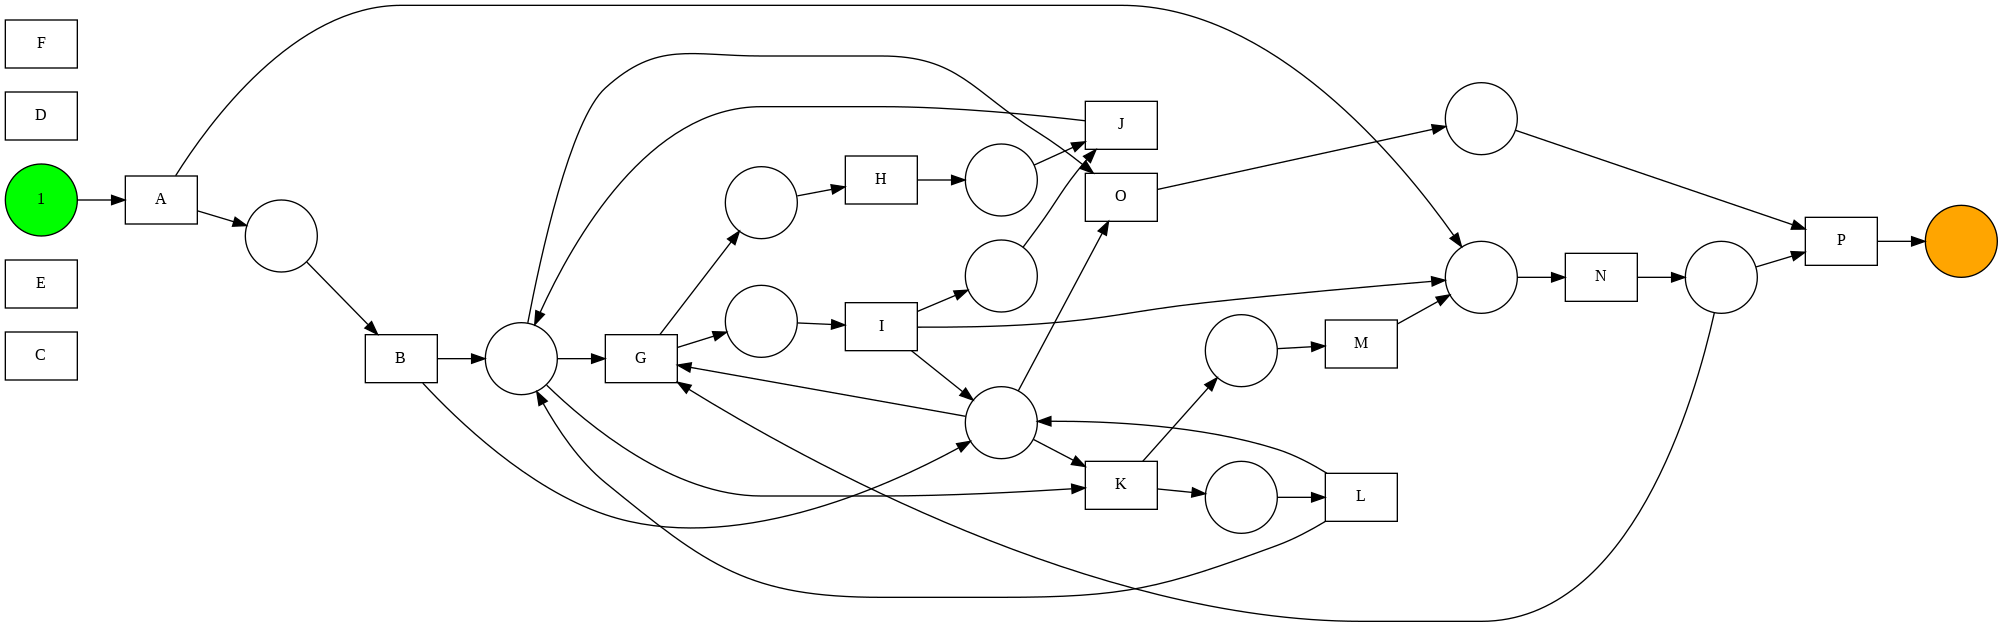

ValueError: ignored

In [ ]:
from pm4py.visualization.petrinet import visualizer as pn_visualizer

gviz = pn_visualizer.apply(net, initial_marking, final_marking)
Image(pn_visualizer.view(gviz))

In [ ]:
from pm4py.algo.conformance.tokenreplay import algorithm as token_replay
replayed_traces = token_replay.apply(log, net, initial_marking, final_marking)
replayed_traces

replaying log with TBR, completed variants ::   0%|          | 0/41 [00:00<?, ?it/s]

[{'activated_transitions': [A, B, N, O, P],
  'consumed_tokens': 8,
  'enabled_transitions_in_marking': {C, D, E, F},
  'missing_tokens': 0,
  'produced_tokens': 8,
  'reached_marking': Marking({end: 1}),
  'remaining_tokens': 0,
  'trace_fitness': 1.0,
  'trace_is_fit': True,
  'transitions_with_problems': []},
 {'activated_transitions': [A, B, N, O, P],
  'consumed_tokens': 8,
  'enabled_transitions_in_marking': {C, D, E, F},
  'missing_tokens': 0,
  'produced_tokens': 8,
  'reached_marking': Marking({end: 1}),
  'remaining_tokens': 0,
  'trace_fitness': 1.0,
  'trace_is_fit': True,
  'transitions_with_problems': []},
 {'activated_transitions': [A, B, C, D, E, F, N, O, P],
  'consumed_tokens': 8,
  'enabled_transitions_in_marking': {C, D, E, F},
  'missing_tokens': 0,
  'produced_tokens': 8,
  'reached_marking': Marking({end: 1}),
  'remaining_tokens': 0,
  'trace_fitness': 1.0,
  'trace_is_fit': True,
  'transitions_with_problems': []},
 {'activated_transitions': [A, B, N, O, P],
  

In [ ]:
trace = pd.DataFrame(replayed_traces, 
                     columns=['activated_transitions',
                              'produced_tokens',
                              'consumed_tokens',
                              'remaining_tokens',
                              'missing_tokens',
                              'trace_fitness',
                              'trace_is_fit'
                              ]
                     )

In [ ]:
trace

,activated_transitions,produced_tokens,consumed_tokens,remaining_tokens,missing_tokens,trace_fitness,trace_is_fit
0,"[A, B, N, O, P]",8,8,0,0,1.000000,True
1,"[A, B, N, O, P]",8,8,0,0,1.000000,True
2,"[A, B, C, D, E, F, N, O, P]",8,8,0,0,1.000000,True
3,"[A, B, N, O, P]",8,8,0,0,1.000000,True
4,"[A, B, K, L, M, N, O, P]",13,12,1,0,0.961538,False
...,...,...,...,...,...,...,...
102325,"[A, B, N, O, P]",8,8,0,0,1.000000,True
102326,"[A, B, N, O, P]",8,8,0,0,1.000000,True
102327,"[A, B, N, O, P]",8,8,0,0,1.000000,True
102328,"[A, B, N, O, P]",8,8,0,0,1.000000,True


In [ ]:
from pm4py.algo.evaluation.replay_fitness import algorithm as replay_fitness_evaluator
fitness = replay_fitness_evaluator.apply(log, net, initial_marking, final_marking, variant=replay_fitness_evaluator.Variants.TOKEN_BASED)
fitness

replaying log with TBR, completed variants ::   0%|          | 0/41 [00:00<?, ?it/s]

{'average_trace_fitness': 0.999610282059692,
 'log_fitness': 0.9993923001223441,
 'perc_fit_traces': 99.16349066744846,
 'percentage_of_fitting_traces': 99.16349066744846}

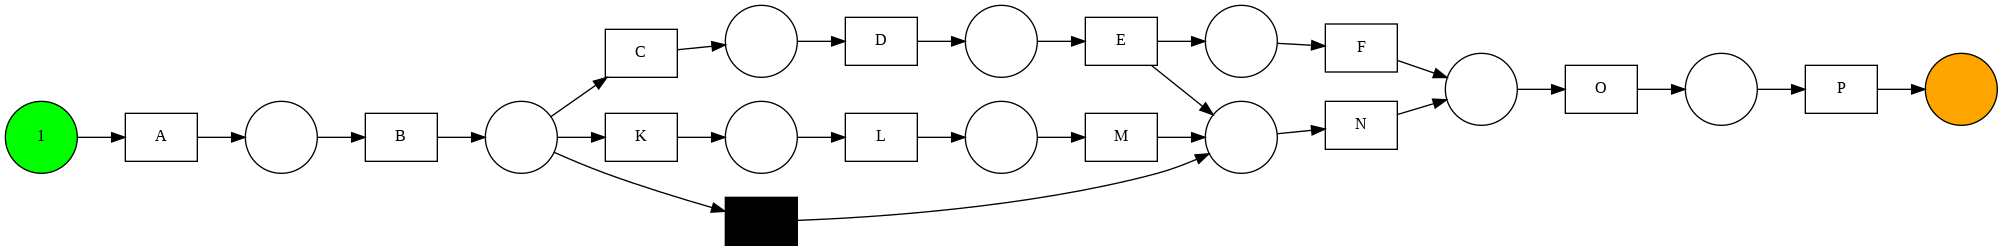

In [ ]:
from pm4py.algo.discovery.heuristics import algorithm as heuristics_miner
net, im, fm = heuristics_miner.apply(log, parameters={heuristics_miner.Variants.CLASSIC.value.Parameters.DEPENDENCY_THRESH: 0.99})

from pm4py.visualization.petri_net import visualizer as pn_visualizer
gviz = pn_visualizer.apply(net, im, fm)
pn_visualizer.view(gviz)

replaying log with TBR, completed variants ::   0%|          | 0/41 [00:00<?, ?it/s]

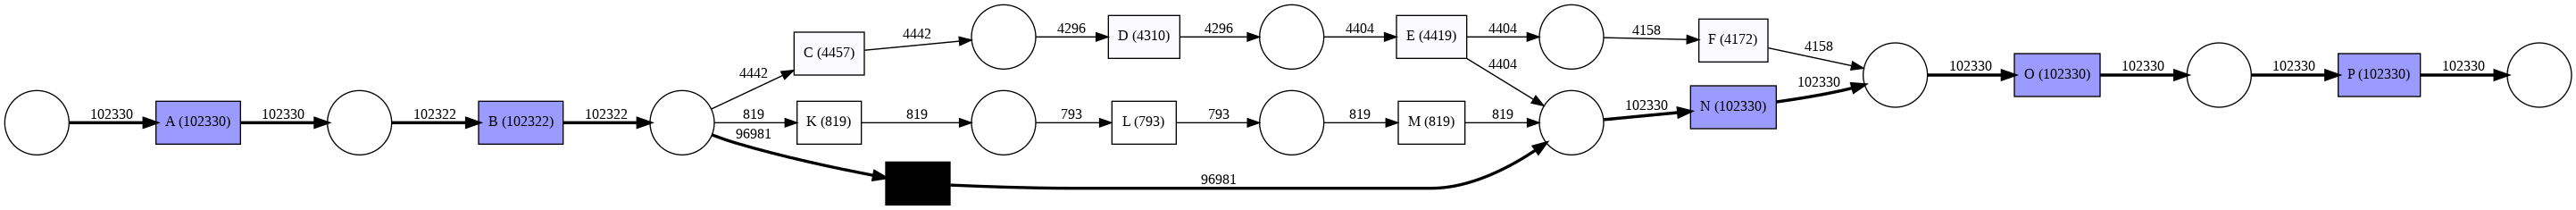

ValueError: ignored

In [ ]:
parameters = {pn_visualizer.Variants.FREQUENCY.value.Parameters.FORMAT: "png"}
gviz = pn_visualizer.apply(net, initial_marking, final_marking, 
                           parameters=parameters, 
                           variant=pn_visualizer.Variants.FREQUENCY, 
                           log=log)

img = pn_visualizer.view(gviz)
Image(img)